## CP5 - Modelos de Aprendizado Supervisionado - Classificação Avaliação e Disponibilização do modelo


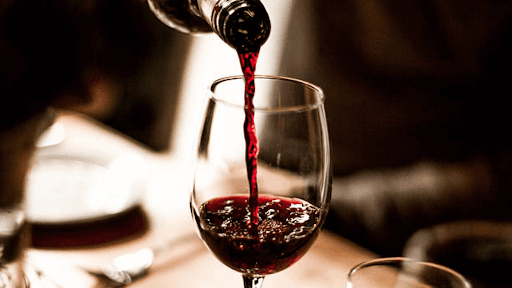


Esse conjunto de dados contém informações sobre 6.498 vinhos, com diversas características químicas e físicas que podem influenciar sua qualidade. As colunas incluem:

`Fixed acidity`: Acidez fixa do vinho, que pode afetar seu sabor e preservação.

`Volatile acidity`: Acidez volátil, geralmente associada a defeitos no vinho.

`Citric acid`: Nível de ácido cítrico, que pode contribuir para a frescura e sabor do vinho.

`Residual sugar`: Açúcar residual após a fermentação, que impacta na doçura do vinho.

`Chlorides`: Concentração de cloretos, que pode afetar o gosto e a salinidade.
Free sulfur dioxide: Dióxido de enxofre livre, utilizado como conservante e antioxidante.

`Total sulfur dioxide`: Total de dióxido de enxofre, incluindo a fração livre.
Density: Densidade do vinho, que pode estar relacionada à sua composição.

`pH`: Medida da acidez do vinho, importante para o equilíbrio do sabor.

`Sulphates`: Concentração de sulfatos, que podem influenciar a sensação na boca.

`Alcohol`: Teor alcoólico do vinho, que impacta na percepção de corpo e sabor.

`Tipo`: Classificação do vinho (tinto ou branco).

`Qualidade`: Avaliação sensorial da qualidade do vinho em uma escala




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Setando o csv e importando libs iniciais**

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path_vin = "/content/drive/MyDrive/dados_20240808/wine_quality_general.csv"

**Limpando o csv e pegando e eliminado possíveis outliers para o correto treinamento dos modelos**

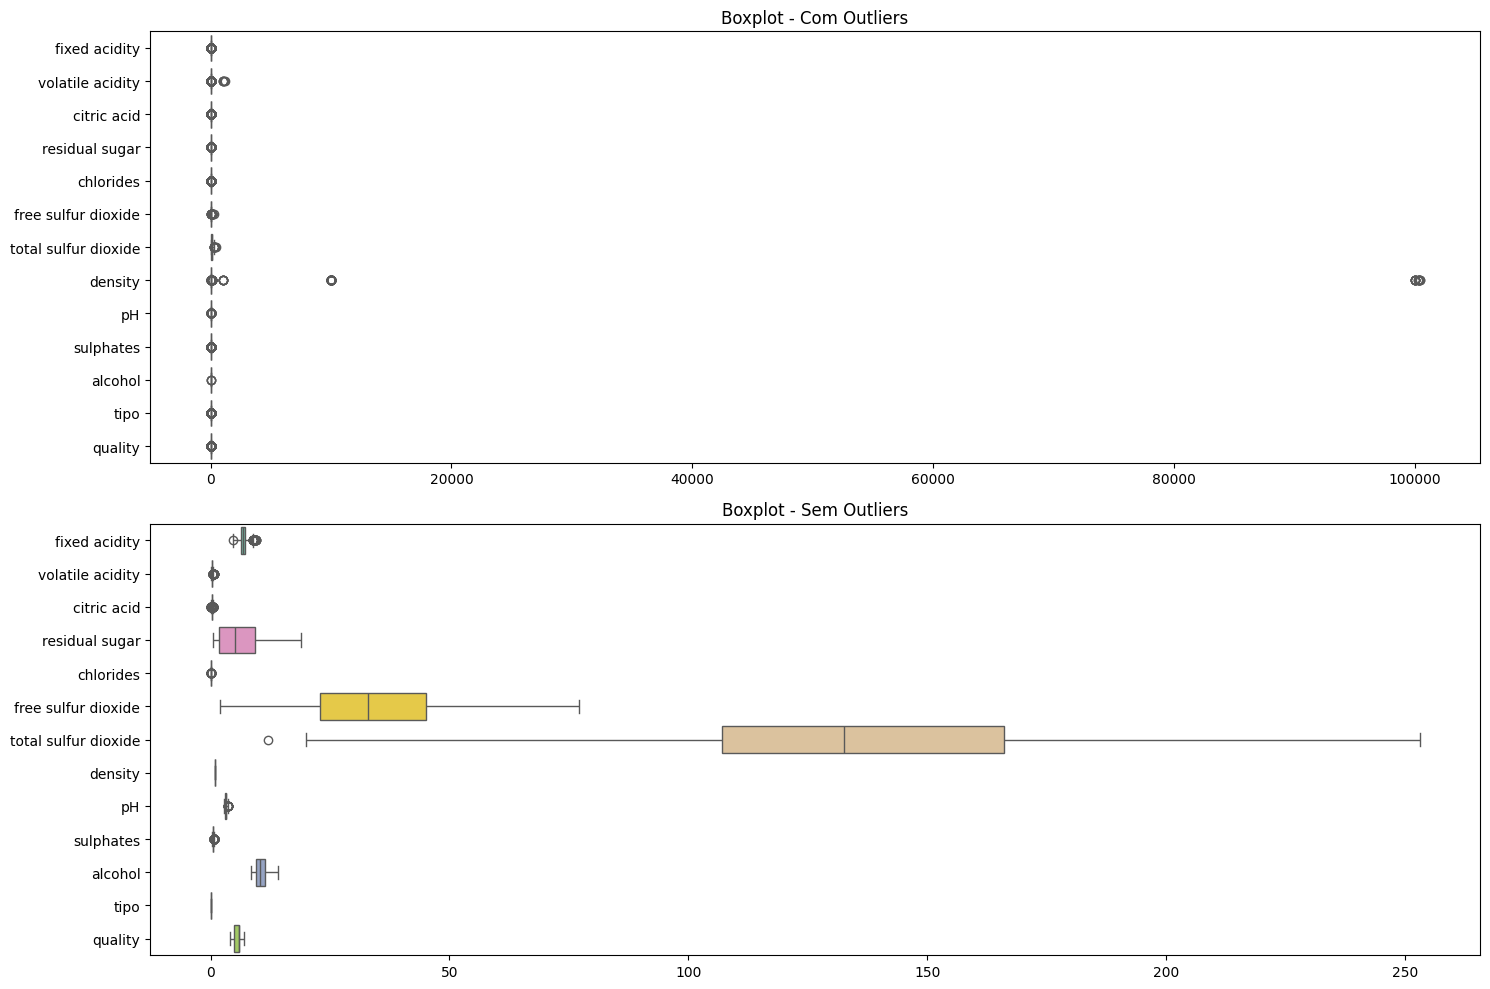

In [5]:
with open(path_vin, 'r', encoding="ISO-8859-1") as file:
    header = file.readline().strip().split(';')

vin = pd.read_csv(path_vin, sep=';', encoding="ISO-8859-1", header=None, skiprows=1)

vin.columns = header[:len(vin.columns)]

if 'tipo' in vin.columns:
    vin['tipo'] = vin['tipo'].map({'branco': 0, 'vermelho': 1})

vin = vin.apply(pd.to_numeric, errors='coerce')

vin = vin.dropna(axis=1, how='all')

vin = vin.apply(lambda col: col.fillna(col.mode()[0]) if not col.mode().empty else col, axis=0)

def remover_outliers(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        df = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]

    return df

def plotar_boxplots(df_original, df_sem_outliers):
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 1, 1)
    sns.boxplot(data=df_original.select_dtypes(include=[np.number]), orient="h", palette="Set2")
    plt.title('Boxplot - Com Outliers')

    plt.subplot(2, 1, 2)
    sns.boxplot(data=df_sem_outliers.select_dtypes(include=[np.number]), orient="h", palette="Set2")
    plt.title('Boxplot - Sem Outliers')

    plt.tight_layout()
    plt.show()

vin_sem_outliers = remover_outliers(vin)

plotar_boxplots(vin, vin_sem_outliers)

**Separando os dados em treino e teste (80% para treinamento e 20% para teste)**

In [6]:
from sklearn.model_selection import train_test_split

In [9]:
x = vin_sem_outliers.drop(columns = 'quality')
y = vin_sem_outliers['quality']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#**Análise de Dados**

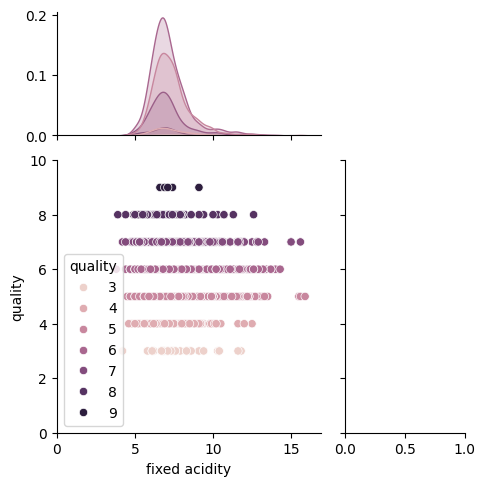

Coeficiente de Correlação entre 'fixed acidity' e 'quality': -0.08
                  sum_sq      df         F        PR(>F)
C(quality)     80.229167     6.0  8.008334  1.244225e-08
Residual    10838.033499  6491.0       NaN           NaN
--------------------------------------------------------------------------------


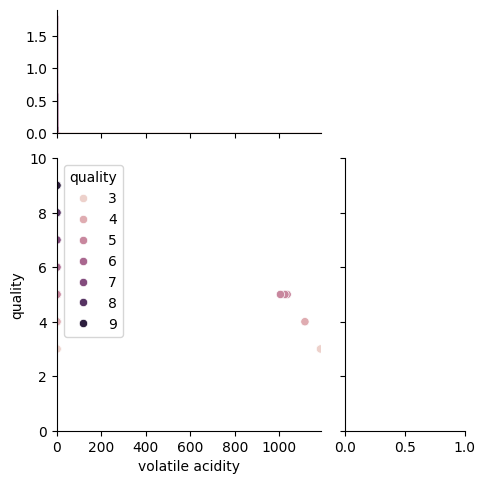

Coeficiente de Correlação entre 'volatile acidity' e 'quality': -0.05
                  sum_sq      df          F        PR(>F)
C(quality)  5.342637e+04     6.0  10.108142  3.757575e-11
Residual    5.718007e+06  6491.0        NaN           NaN
--------------------------------------------------------------------------------


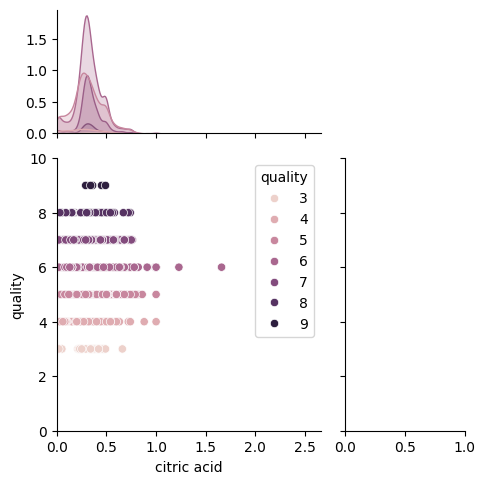

Coeficiente de Correlação entre 'citric acid' e 'quality': 0.09
                sum_sq      df         F        PR(>F)
C(quality)    1.157636     6.0  9.219672  4.423641e-10
Residual    135.836651  6491.0       NaN           NaN
--------------------------------------------------------------------------------


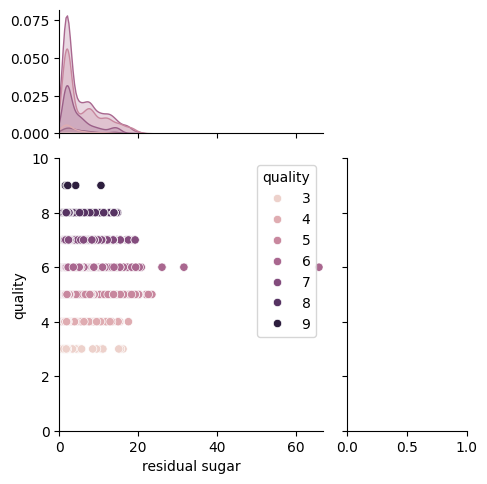

Coeficiente de Correlação entre 'residual sugar' e 'quality': -0.04
                   sum_sq      df         F        PR(>F)
C(quality)    1227.562717     6.0  9.106477  6.050203e-10
Residual    145832.271521  6491.0       NaN           NaN
--------------------------------------------------------------------------------


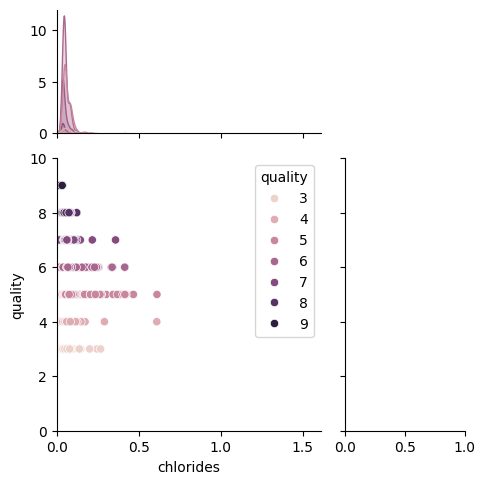

Coeficiente de Correlação entre 'chlorides' e 'quality': -0.20
              sum_sq      df          F        PR(>F)
C(quality)  0.358022     6.0  50.862783  1.881766e-61
Residual    7.615009  6491.0        NaN           NaN
--------------------------------------------------------------------------------


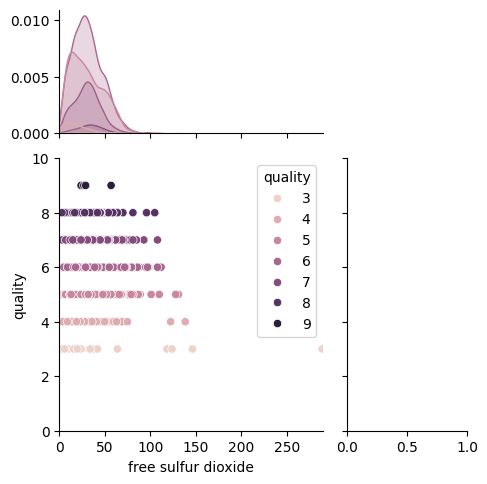

Coeficiente de Correlação entre 'free sulfur dioxide' e 'quality': 0.06
                  sum_sq      df          F        PR(>F)
C(quality)  2.772335e+04     6.0  14.909025  5.199250e-17
Residual    2.011670e+06  6491.0        NaN           NaN
--------------------------------------------------------------------------------


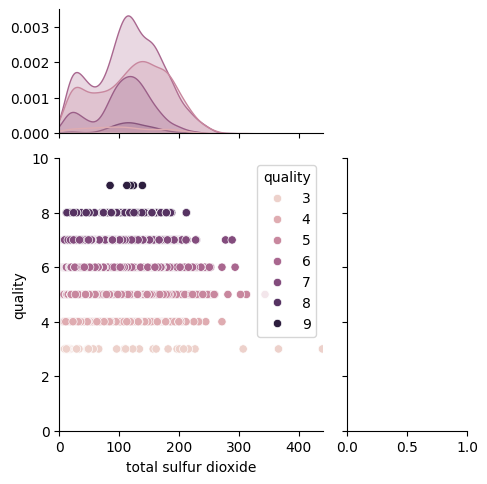

Coeficiente de Correlação entre 'total sulfur dioxide' e 'quality': -0.04
                  sum_sq      df        F        PR(>F)
C(quality)  1.469957e+05     6.0  7.71743  2.758213e-08
Residual    2.060593e+07  6491.0      NaN           NaN
--------------------------------------------------------------------------------


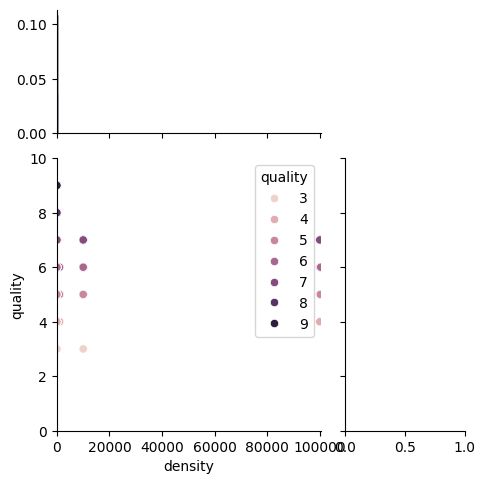

Coeficiente de Correlação entre 'density' e 'quality': -0.03
                  sum_sq      df         F    PR(>F)
C(quality)  1.580525e+08     6.0  1.104977  0.356571
Residual    1.547422e+11  6491.0       NaN       NaN
--------------------------------------------------------------------------------


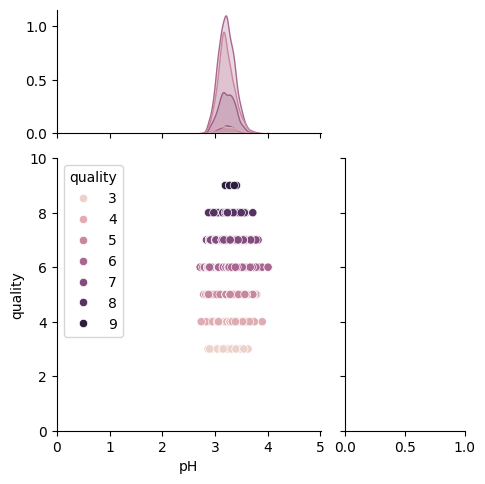

Coeficiente de Correlação entre 'pH' e 'quality': 0.02
                sum_sq      df         F    PR(>F)
C(quality)    0.313355     6.0  2.022319  0.059209
Residual    167.628065  6491.0       NaN       NaN
--------------------------------------------------------------------------------


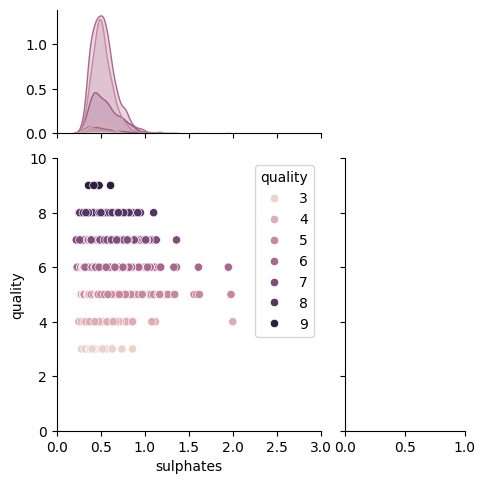

Coeficiente de Correlação entre 'sulphates' e 'quality': 0.04
                sum_sq      df         F    PR(>F)
C(quality)    0.572877     6.0  4.325792  0.000231
Residual    143.270250  6491.0       NaN       NaN
--------------------------------------------------------------------------------


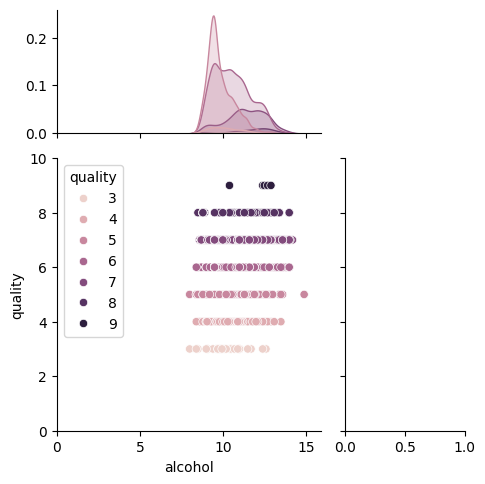

Coeficiente de Correlação entre 'alcohol' e 'quality': 0.44
                 sum_sq      df           F  PR(>F)
C(quality)  2075.166106     6.0  313.266807     0.0
Residual    7166.363685  6491.0         NaN     NaN
--------------------------------------------------------------------------------


In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

colunas_independentes = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                         'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                         'density', 'pH', 'sulphates', 'alcohol']

for coluna in colunas_independentes:
    plot = sns.jointplot(data=vin, x=coluna, y="quality", hue='quality',
                         height=5, ratio=2, marginal_ticks=True)

    plot.ax_joint.set_xlim(0, vin[coluna].max() + 1)
    plot.ax_joint.set_ylim(0, vin["quality"].max() + 1)

    plt.show()

    correlacao = vin[coluna].corr(vin['quality'])
    print(f"Coeficiente de Correlação entre '{coluna}' e 'quality': {correlacao:.2f}")

    modelo = ols(f'Q("{coluna}") ~ C(quality)', data=vin).fit()
    anova_table = sm.stats.anova_lm(modelo, typ=2)
    print(anova_table)
    print("-" * 80)


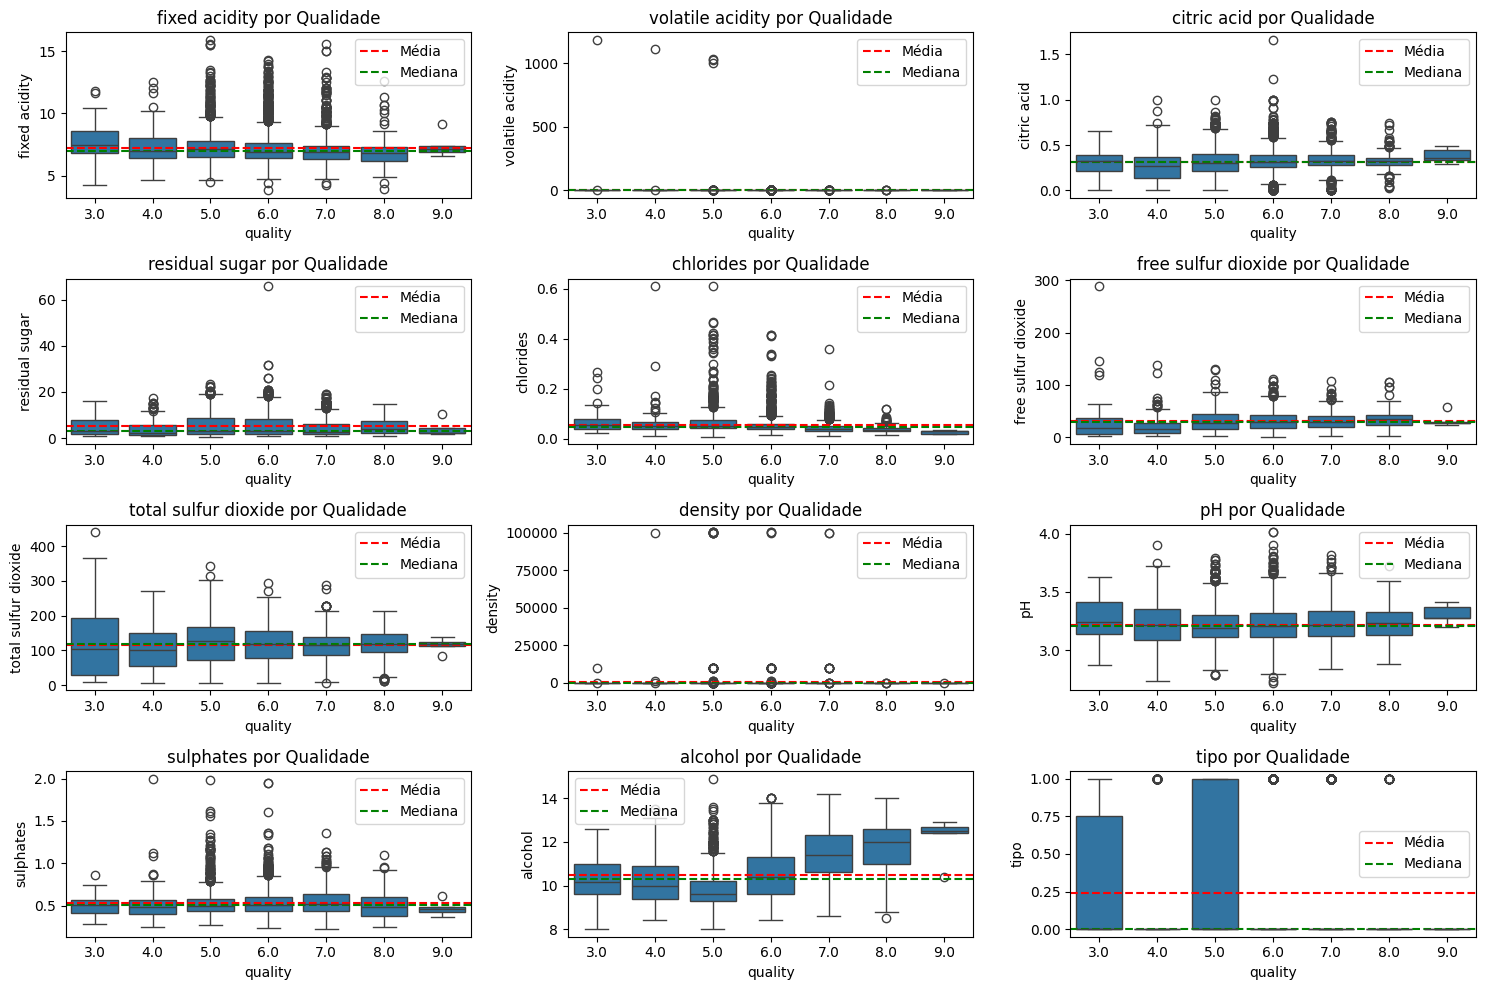

In [35]:
import seaborn as sns

variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
             'density', 'pH', 'sulphates', 'alcohol', 'tipo']

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x='quality', y=var, data=vin)
    plt.title(f'{var} por Qualidade')
    plt.axhline(y=vin[var].mean(), color='red', linestyle='--', label='Média')
    plt.axhline(y=vin[var].median(), color='green', linestyle='--', label='Mediana')
    plt.legend()

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

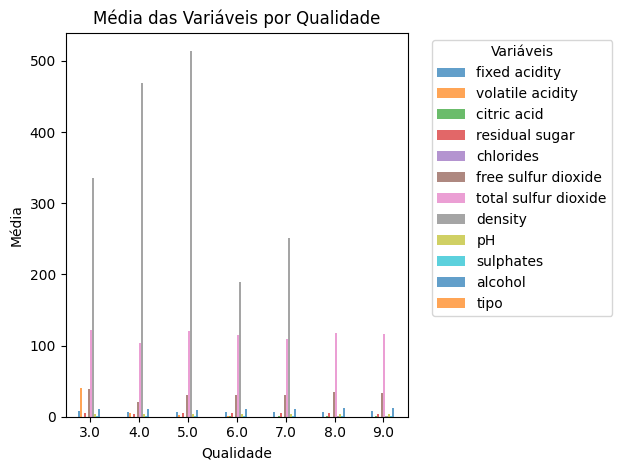

In [32]:
mean_values = vin.groupby('quality').mean()

plt.figure(figsize=(12, 6))
mean_values.plot(kind='bar', alpha=0.7)
plt.title('Média das Variáveis por Qualidade')
plt.xlabel('Qualidade')
plt.ylabel('Média')
plt.xticks(rotation=0)
plt.legend(title='Variáveis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [34]:
print(vin[['quality', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
            'sulphates', 'alcohol', 'tipo']].describe())

           quality  fixed acidity  volatile acidity  citric acid  \
count  6498.000000    6498.000000       6498.000000  6498.000000   
mean      5.818406       7.215243          1.164470     0.318455   
std       0.873191       1.296344         29.804746     0.145209   
min       3.000000       3.800000          0.080000     0.000000   
25%       5.000000       6.400000          0.230000     0.250000   
50%       6.000000       7.000000          0.290000     0.310000   
75%       6.000000       7.700000          0.400000     0.390000   
max       9.000000      15.900000       1185.000000     1.660000   

       residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide  \
count     6498.000000  6498.000000          6498.000000           6498.000000   
mean         5.442705     0.056032            30.490459            115.743844   
std          4.757629     0.035031            17.717159             56.517535   
min          0.600000     0.009000             1.000000        

# Modelo **RandomForest**

              precision    recall  f1-score   support

         4.0       0.50      0.08      0.14        24
         5.0       0.76      0.69      0.72       237
         6.0       0.67      0.84      0.75       370
         7.0       0.81      0.57      0.67       178

    accuracy                           0.71       809
   macro avg       0.68      0.55      0.57       809
weighted avg       0.72      0.71      0.70       809



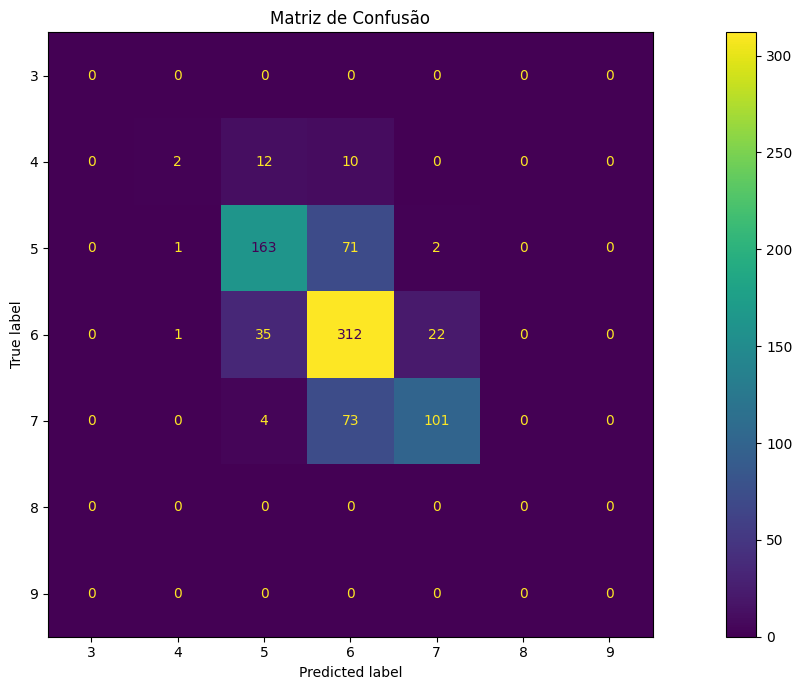


#Falsos Positivos
- Classe 3: 0 (0.00%)
- Classe 4: 2 (0.25%)
- Classe 5: 51 (6.30%)
- Classe 6: 154 (19.04%)
- Classe 7: 24 (2.97%)
- Classe 8: 0 (0.00%)
- Classe 9: 0 (0.00%)

#Falsos Negativos
- Classe 3: 0 (0.00%)
- Classe 4: 22 (2.72%)
- Classe 5: 74 (9.15%)
- Classe 6: 58 (7.17%)
- Classe 7: 77 (9.52%)
- Classe 8: 0 (0.00%)
- Classe 9: 0 (0.00%)


In [36]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import numpy as np

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)


y_predicoes = rf.predict(x_test)

print(classification_report(y_test, y_predicoes, zero_division=0))


matriz_confusao = confusion_matrix(y_true=y_test, y_pred=y_predicoes, labels=[3, 4, 5, 6, 7, 8, 9])


fig, ax = plt.subplots(figsize=(15, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=[3, 4, 5, 6, 7, 8, 9])
disp.plot(ax=ax, values_format='d')

falsos_positivos = matriz_confusao.sum(axis=0) - np.diag(matriz_confusao)
falsos_negativos = matriz_confusao.sum(axis=1) - np.diag(matriz_confusao)

total_testes = matriz_confusao.sum()
porcentagem_falsos_positivos = (falsos_positivos / total_testes) * 100
porcentagem_falsos_negativos = (falsos_negativos / total_testes) * 100

plt.title('Matriz de Confusão')
plt.tight_layout()
plt.show()

print("\n#Falsos Positivos")
for i in range(len(falsos_positivos)):
    print(f"- Classe {i + 3}: {falsos_positivos[i]} ({porcentagem_falsos_positivos[i]:.2f}%)")

print("\n#Falsos Negativos")
for i in range(len(falsos_negativos)):
    print(f"- Classe {i + 3}: {falsos_negativos[i]} ({porcentagem_falsos_negativos[i]:.2f}%)")


# Modelo **Naive Bayes Gaussiano**

              precision    recall  f1-score   support

         4.0       0.21      0.17      0.19        24
         5.0       0.49      0.62      0.55       237
         6.0       0.54      0.41      0.47       370
         7.0       0.43      0.50      0.46       178

    accuracy                           0.49       809
   macro avg       0.42      0.43      0.42       809
weighted avg       0.49      0.49      0.48       809



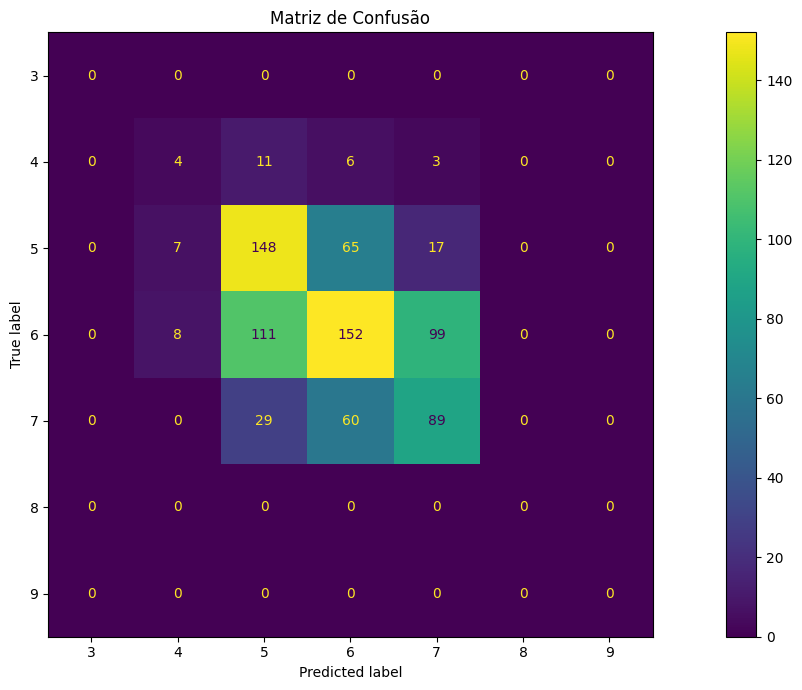


#Falsos Positivos
- Classe 3: 0 (0.00%)
- Classe 4: 15 (1.85%)
- Classe 5: 151 (18.67%)
- Classe 6: 131 (16.19%)
- Classe 7: 119 (14.71%)
- Classe 8: 0 (0.00%)
- Classe 9: 0 (0.00%)

#Falsos Negativos
- Classe 3: 0 (0.00%)
- Classe 4: 20 (2.47%)
- Classe 5: 89 (11.00%)
- Classe 6: 218 (26.95%)
- Classe 7: 89 (11.00%)
- Classe 8: 0 (0.00%)
- Classe 9: 0 (0.00%)


In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import (classification_report)


gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_predicoes = gnb.predict(x_test)

print(classification_report(y_test, y_predicoes, zero_division=0))
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=[3,4,5,6,7,8,9])

fig, ax = plt.subplots(figsize=(15, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=[3, 4, 5, 6, 7, 8, 9])
disp.plot(ax=ax, values_format='d')

falsos_positivos = matriz_confusao.sum(axis=0) - np.diag(matriz_confusao)
falsos_negativos = matriz_confusao.sum(axis=1) - np.diag(matriz_confusao)

total_testes = matriz_confusao.sum()
porcentagem_falsos_positivos = (falsos_positivos / total_testes) * 100
porcentagem_falsos_negativos = (falsos_negativos / total_testes) * 100

plt.title('Matriz de Confusão')
plt.tight_layout()
plt.show()

print("\n#Falsos Positivos")
for i in range(len(falsos_positivos)):
    print(f"- Classe {i + 3}: {falsos_positivos[i]} ({porcentagem_falsos_positivos[i]:.2f}%)")

print("\n#Falsos Negativos")
for i in range(len(falsos_negativos)):
    print(f"- Classe {i + 3}: {falsos_negativos[i]} ({porcentagem_falsos_negativos[i]:.2f}%)")

# Modelo **LDA**

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00        24
         5.0       0.61      0.46      0.53       237
         6.0       0.52      0.76      0.62       370
         7.0       0.56      0.25      0.35       178

    accuracy                           0.54       809
   macro avg       0.42      0.37      0.37       809
weighted avg       0.54      0.54      0.51       809



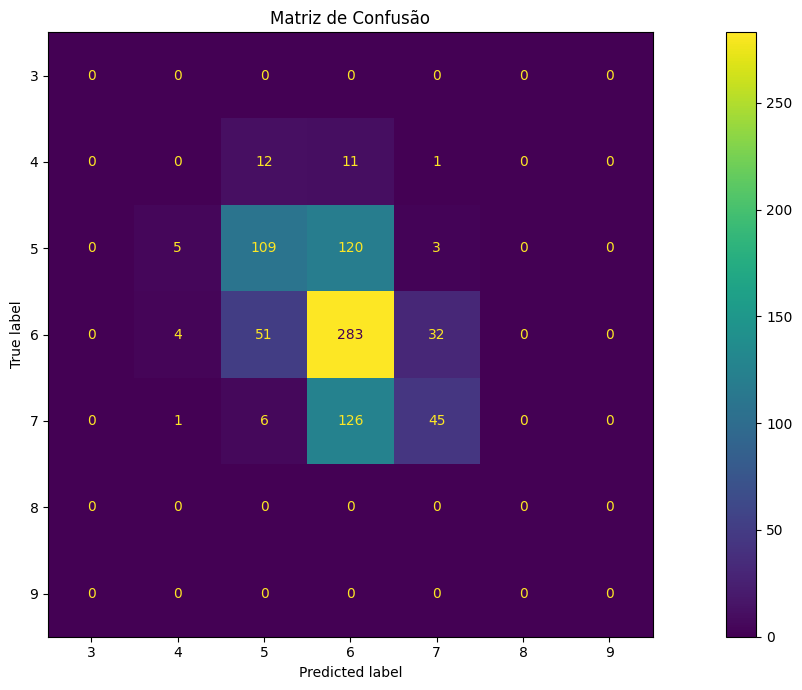


#Falsos Positivos
- Classe 3: 0 (0.00%)
- Classe 4: 10 (1.24%)
- Classe 5: 69 (8.53%)
- Classe 6: 257 (31.77%)
- Classe 7: 36 (4.45%)
- Classe 8: 0 (0.00%)
- Classe 9: 0 (0.00%)

#Falsos Negativos
- Classe 3: 0 (0.00%)
- Classe 4: 24 (2.97%)
- Classe 5: 128 (15.82%)
- Classe 6: 87 (10.75%)
- Classe 7: 133 (16.44%)
- Classe 8: 0 (0.00%)
- Classe 9: 0 (0.00%)


In [20]:
lda = LinearDiscriminantAnalysis()

lda.fit(x_train, y_train)

y_predicoes = lda.predict(x_test)


print(classification_report(y_test, y_predicoes, zero_division=0))
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=[3,4,5,6,7,8,9])

fig, ax = plt.subplots(figsize=(15, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=[3, 4, 5, 6, 7, 8, 9])
disp.plot(ax=ax, values_format='d')

falsos_positivos = matriz_confusao.sum(axis=0) - np.diag(matriz_confusao)
falsos_negativos = matriz_confusao.sum(axis=1) - np.diag(matriz_confusao)

total_testes = matriz_confusao.sum()
porcentagem_falsos_positivos = (falsos_positivos / total_testes) * 100
porcentagem_falsos_negativos = (falsos_negativos / total_testes) * 100

plt.title('Matriz de Confusão')
plt.tight_layout()
plt.show()

print("\n#Falsos Positivos")
for i in range(len(falsos_positivos)):
    print(f"- Classe {i + 3}: {falsos_positivos[i]} ({porcentagem_falsos_positivos[i]:.2f}%)")

print("\n#Falsos Negativos")
for i in range(len(falsos_negativos)):
    print(f"- Classe {i + 3}: {falsos_negativos[i]} ({porcentagem_falsos_negativos[i]:.2f}%)")

***MELHOR MODELO?***

**Comparação**:

O LDA teve o desempenho mais fraco dos três modelos, com uma acurácia de 54%. O modelo teve dificuldades especialmente com a classe 6, apresentando o maior número de falsos positivos (31.77%). Além disso, teve muitos falsos negativos na classe 7 (16.44%), mostrando que ele não identificou corretamente uma boa parte dessas instâncias.

O Naive Bayes Gaussiano apresentou o pior desempenho geral, com a menor acurácia (49%). Apesar de sua simplicidade, o modelo foi bastante impreciso ao classificar as instâncias, principalmente nas classes 5 e 6, com 18.67% de falsos positivos para a classe 5 e impressionantes 26.95% de falsos negativos na classe 6. O alto número de falsos negativos na classe 6 indica que o modelo falhou ao identificar corretamente muitos exemplos dessa classe.

O Random Forest teve o melhor desempenho, com uma acurácia significativamente maior (71%) e o maior f1-score ponderado (70%). Embora tenha tido falsos positivos na classe 6 (19.04%), esse número foi bem menor em comparação com o LDA. Além disso, apresentou a menor quantidade de falsos negativos, especialmente na classe 6 (7.17%). O desempenho balanceado entre precisão e recall o torna mais confiável para prever as diferentes classes.

**Conclusão**:
Com base nas métricas de desempenho, o Random Forest é o modelo mais robusto e eficaz para essa tarefa de classificação. Ele superou tanto o LDA quanto o Naive Bayes Gaussiano em todas as métricas importantes, incluindo acurácia, precisão, recall e f1-score. O Random Forest teve menos falsos negativos e positivos, o que indica uma maior capacidade de prever corretamente as instâncias.

O Naive Bayes Gaussiano, por outro lado, apresentou o pior desempenho, com a menor acurácia e muitos falsos negativos na classe 6. Isso o torna inadequado para essa tarefa, principalmente porque essa classe parece ser crucial no conjunto de dados.

Já o LDA teve um desempenho intermediário, mas falhou em capturar corretamente muitas instâncias da classe 6, resultando em um alto número de falsos positivos e falsos negativos.

Portanto, Random Forest é a melhor escolha devido à sua performance superior e capacidade de equilibrar a identificação correta de diversas classes, especialmente em cenários onde a classe 6 tem um papel relevante.

# **Carregando o modelo e testando ele**



In [ ]:
from joblib import dump, load

In [ ]:
dump(rf, 'rf_vin.joblib')

['rf_vin.joblib']

In [ ]:
modelo_carregado = load('rf_vin.joblib')

In [ ]:
novos_dados = pd.DataFrame([[6.2, 0.600, 0.08, 2.0, 0.090, 32.0, 44.0, 0.99490, 3.45, 0.58, 10.5, 'branco']],
                           columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                                    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates',
                                    'alcohol', 'tipo'])
def verificar_tipo(tipo):
    if tipo == 'branco':
        return 0
    elif tipo == 'vermelho':
        return 1
    elif tipo in [0, 1]:
        return tipo
    else:
        raise ValueError(f"Valor inválido para 'tipo': {tipo}. Deve ser 'branco', 'vermelho', 0 ou 1.")
try:
    novos_dados['tipo'] = novos_dados['tipo'].apply(verificar_tipo)
except ValueError as e:
    print(e)
    exit()

In [ ]:
previsao = modelo_carregado.predict(novos_dados)
print(previsao)

[5.]
